In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('../../Dataset/Non_Outlier/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
158207,1.0,0.138462,1.0,0.634615,1.0,0.0,0.0,0.450383,0.932099,0.602076,0
61272,0.0,0.123077,1.0,0.538462,1.0,0.0,0.0,0.928685,0.932099,0.242215,0
119141,0.0,0.246154,1.0,0.288462,1.0,1.0,0.0,0.566681,0.932099,0.955017,0
108043,1.0,0.123077,1.0,0.826923,0.0,0.0,0.0,0.227914,0.932099,0.103806,0
190209,0.0,0.138462,1.0,0.288462,0.0,0.0,1.0,0.687305,0.932099,0.813149,0


In [8]:
df_test = pd.read_csv('../../Dataset/kendaraan_test_clean.csv')
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
45471,1,0.507692,1,0.403846,0,1,1,0.061896,0.759259,0.415225,0
42568,1,0.076923,1,0.557692,1,0,0,0.000000,0.932099,0.100346,0
10976,1,0.015385,1,0.115385,1,0,0,0.040637,0.932099,0.723183,0
25847,1,0.246154,1,0.538462,1,1,0,0.092528,0.759259,0.615917,0
16177,1,0.138462,1,0.057692,1,0,0,0.055639,0.932099,0.121107,0


0    202945
1     27686
Name: Tertarik, dtype: int64


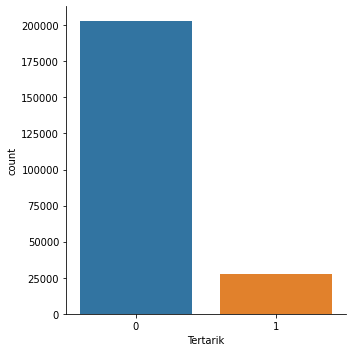

In [9]:
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [10]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

In [11]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42, k_neighbors=5)
x_data, y_data = smt.fit_sample(x_data, y_data)

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_val.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_val.shape}')


x_train shape: (324712, 10)
x_test shape: (81178, 10)
---------------------------------
y_train shape: (324712,)
y_test shape: (81178,)


## **Tuning Model**

In [13]:
classifier = [
    DecisionTreeClassifier(class_weight='balanced'),
    SGDClassifier(class_weight='balanced'),
    GaussianNB(),
    AdaBoostClassifier(),
    RandomForestClassifier(class_weight='balanced'),
]

name = [
    'Decision Tree',
    'SGDClassifier',
    'Naive Bayes',
    'AdaBoost',
    'Random Forest',
]

### **Melatih Model Machine Learning**

In [14]:
for models, i in zip(classifier, name):
    models.fit(x_train, y_train)

In [15]:
def report(model, title, x_test, y_test):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    f1 = f1_score(y_test, result)
    recall = recall_score(y_test, result)
    precision = precision_score(y_test, result)
    roc = roc_auc_score(y_test, result)
    accuracy = accuracy_score(y_test, result)

    print("F1-Score \t:", f1)
    print("Recall \t\t:", recall)
    print("Precision \t:", precision)
    print("ROC-AUC \t:", roc)
    print("Accuracy \t:", accuracy, end="\n\n")

    return title, f1, recall, precision, roc, accuracy

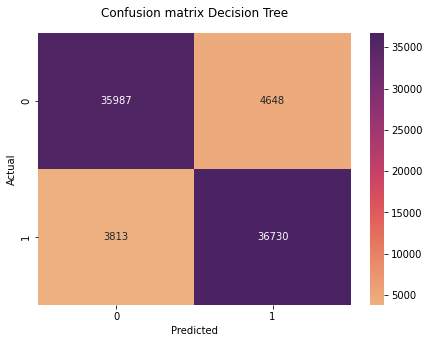

F1-Score 	: 0.8967175693656083
Recall 		: 0.9059517055965272
Precision 	: 0.88766977620958
ROC-AUC 	: 0.8957837770015367
Accuracy 	: 0.8957722535662371



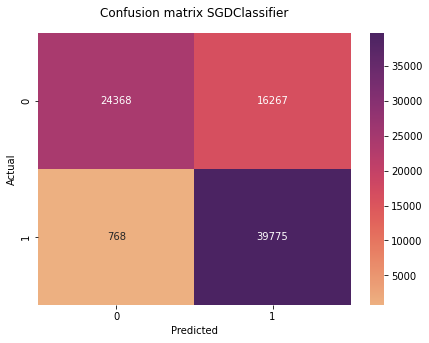

F1-Score 	: 0.8236268571724388
Recall 		: 0.9810571491996152
Precision 	: 0.70973555547625
ROC-AUC 	: 0.7903686139747307
Accuracy 	: 0.790152504373106



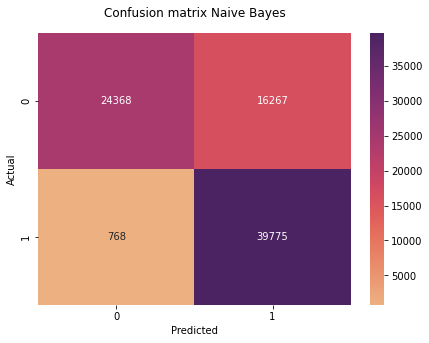

F1-Score 	: 0.8236268571724388
Recall 		: 0.9810571491996152
Precision 	: 0.70973555547625
ROC-AUC 	: 0.7903686139747307
Accuracy 	: 0.790152504373106



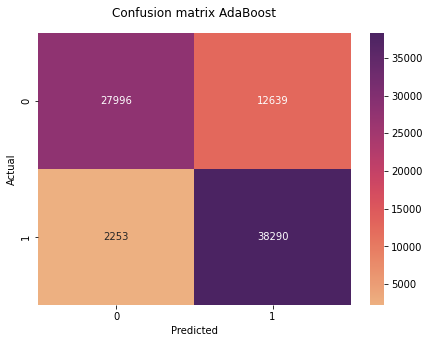

F1-Score 	: 0.837196081861116
Recall 		: 0.9444293712848087
Precision 	: 0.7518309803844568
ROC-AUC 	: 0.8166960440772513
Accuracy 	: 0.8165512823671438



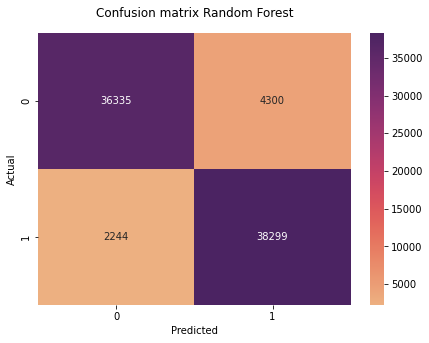

F1-Score 	: 0.9212912847898775
Recall 		: 0.9446513578176258
Precision 	: 0.8990586633489049
ROC-AUC 	: 0.9194156259987599
Accuracy 	: 0.9193870260415383



In [16]:
metrics_report = []

for models, i in zip(classifier, name):
    title, f1, recall, precision, roc, accuracy = report(models, i, x_val, y_val)
    metrics_report.append([title, f1, recall, precision, roc, accuracy])

In [17]:
metrics_report = pd.DataFrame(metrics_report, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report.sort_values(by=['ROC-AUC'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
4,Random Forest,0.921291,0.944651,0.899059,0.919416,0.919387
0,Decision Tree,0.896718,0.905952,0.887670,0.895784,0.895772
3,AdaBoost,0.837196,0.944429,0.751831,0.816696,0.816551
1,SGDClassifier,0.823627,0.981057,0.709736,0.790369,0.790153
2,Naive Bayes,0.823627,0.981057,0.709736,0.790369,0.790153


## **Memprediksi Dan Evaluasi Data Test**

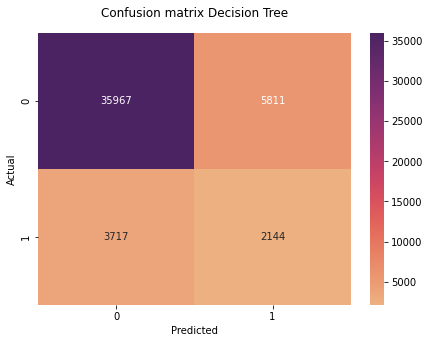

F1-Score 	: 0.31036479444122755
Recall 		: 0.3658078826138884
Precision 	: 0.26951602765556254
ROC-AUC 	: 0.6133577686802029
Accuracy 	: 0.7999958017590629



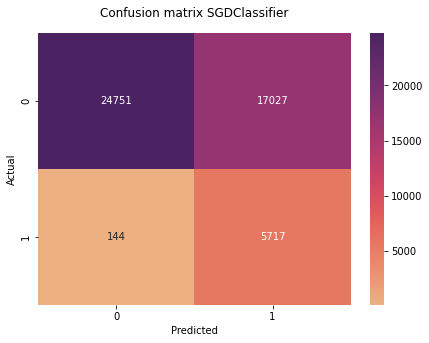

F1-Score 	: 0.39972032861387874
Recall 		: 0.9754308138542911
Precision 	: 0.25136299683432994
ROC-AUC 	: 0.7839359057542793
Accuracy 	: 0.6395600243497974



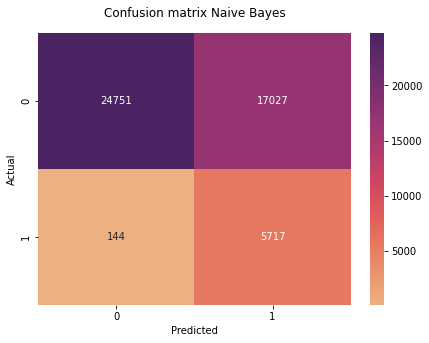

F1-Score 	: 0.39972032861387874
Recall 		: 0.9754308138542911
Precision 	: 0.25136299683432994
ROC-AUC 	: 0.7839359057542793
Accuracy 	: 0.6395600243497974



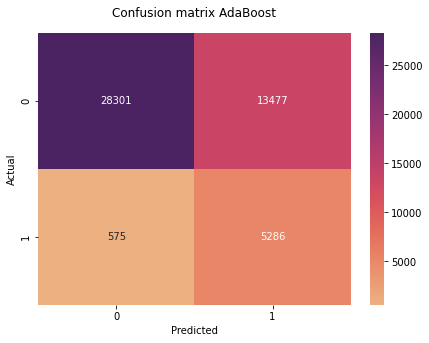

F1-Score 	: 0.429337231968811
Recall 		: 0.9018938747653984
Precision 	: 0.28172467089484626
ROC-AUC 	: 0.7896539123455983
Accuracy 	: 0.7050315917630513



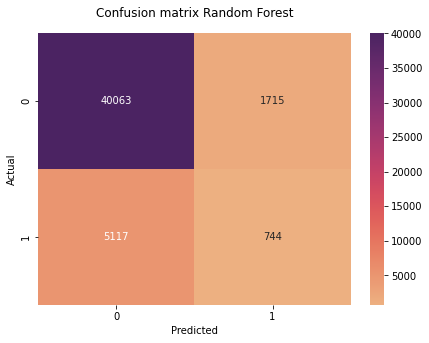

F1-Score 	: 0.17884615384615388
Recall 		: 0.12694079508616277
Precision 	: 0.3025620170801139
ROC-AUC 	: 0.5429452407620003
Accuracy 	: 0.8565880895904616



In [18]:
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

metrics_report_test = []

for models, i in zip(classifier, name):
    title, f1, recall, precision, roc, accuracy = report(models, i, x_test, y_test)
    metrics_report_test.append([title, f1, recall, precision, roc, accuracy])

In [19]:
metrics_report_test = pd.DataFrame(metrics_report_test, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report_test.sort_values(by=['ROC-AUC'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
3,AdaBoost,0.429337,0.901894,0.281725,0.789654,0.705032
1,SGDClassifier,0.399720,0.975431,0.251363,0.783936,0.639560
2,Naive Bayes,0.399720,0.975431,0.251363,0.783936,0.639560
0,Decision Tree,0.310365,0.365808,0.269516,0.613358,0.799996
4,Random Forest,0.178846,0.126941,0.302562,0.542945,0.856588
